# **Análise Exploratória de Dados de Logística | Python**

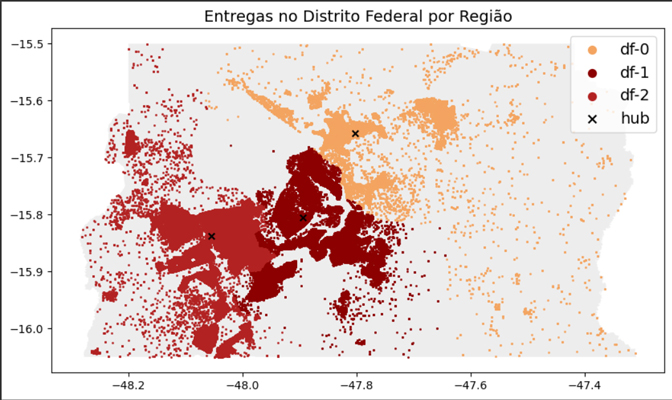

<font size= 4> **Neste projeto, será realizada uma Análise Exploratória de Dados (EDA), com o intuito de explorar a relação entre os hubs (locais estratégicos para a redistribuição de mercadorias) da empresa Loggi e seus pontos de entregas localizados no Distrito Federal (DF).** </font>

---

## **Índice**

1. Contexto

    1.1. O Projeto 

    1.2. A Empresa

    1.3. Os Dados

2. Pacotes e bibliotecas
3. Exploração dos Dados
  
    3.1. Coleta dos Dados

    3.2. Wrangling

    3.3. Geocodificação

    3.4. Qualidade

4. Visualização

5. Insight

---


# **1. Contexto** 

## **1.1. O Projeto**

Esse projeto consiste em analisar um conjunto de dados que contém as entregas da empresa Loggi na região de Brasilia. 

Verificaremos a relação entre a distância dos hubs e suas entregas e também a capacidade dos veículos. 

Após a análise, iremos discutir se e como essas relações podem ser otimizadas.



## **1.2. A Empresa**

A Loggi é uma das maiores transportadoras privadas do país e uma empresa brasileira de logística que atua principalmente no setor de e-commerce.



## **1.3. Os Dados**

Os dados são sintetizados de fontes públicas (IBGE, IPEA, etc.) e são representativos dos desafios que a startup enfrenta no dia a dia, especialmente com relação a sua escala.


# **2\. Pacotes e bibliotecas**

* import json  <font color="#41B0E7"> - <i> Codifica e decodifica dados no formato JSON </i> </font>
 
* import pandas as pd <font color="#41B0E7"> - <i> Manipula e análisa dados tabulares </i> </font>

* import geopy <font color="#41B0E7"> - <i> Geocodificação em Python </i> </font>

* from geopy.geocoders import Nominatim<font color="#41B0E7"> - <i> Converte endereços em coordenadas geográficas e vice-versa </i> </font> 

* from geopy.extra.rate_limiter import RateLimiter <font color="#41B0E7"> - <i> Limita as taxas de chamada de uma função </i> </font>
  
* import numpy as np <font color="#41B0E7"> - <i> Fornece suporte para operações com matrizes e funções matemáticas </i> </font>
 
* import geopandas <font color="#41B0E7"> - <i> Adiciona funcionalidades geoespaciais ao Panda </i> </font>
  
* import matplotlib.pyplot as plt <font color="#41B0E7"> - <i> Gera gráficos </i> </font>
  
* import seaborn as sns <font color="#41B0E7"> - <i> Gera gráficos </i> </font>
  
  

# **3. Exploração dos Dados**

## **3.1. Coleta dos Dados**

**Baixar os dados de um arquivo JSON:**

In [ ]:
!wget -q "https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/deliveries.json" -O deliveries.json 

**Carregar os dados do arquivo em um dicionário Python:**

In [ ]:
import json
import pandas as pd

with open('deliveries.json', mode='r', encoding='utf8') as file:
  data = json.load(file)

**Conhecendo alguns dos dados:**

In [ ]:
# O Número de linhas
len(data)

199

In [ ]:
# O nome das colunas
nomecol = data[0]
print(nomecol.keys())

dict_keys(['name', 'region', 'origin', 'vehicle_capacity', 'deliveries'])


## **3.2. Wrangling**

**Criar um dataframe Pandas para facilitar a visualização e manipulação:**




In [ ]:
entregas_df = pd.DataFrame(data)
 
entregas_df.head()

,name,region,origin,vehicle_capacity,deliveries
0,cvrp-2-df-33,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'p..."
1,cvrp-2-df-73,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'bf3fc630b1c29601a4caf1bdd474b85', 'po..."
2,cvrp-2-df-20,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'b30f1145a2ba4e0b9ac0162b68d045c3', 'p..."
3,cvrp-1-df-71,df-1,"{'lng': -47.89366206897872, 'lat': -15.8051175...",180,"[{'id': 'be3ed547394196c12c7c27c89ac74ed6', 'p..."
4,cvrp-2-df-87,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'a6328fb4dc0654eb28a996a270b0f6e4', 'p..."


**Normalizando a coluna origin**

A coluna origin tem dados aninhados, vamos normalizar:

  1. Em um novo dataframe, transforrmar cada chave da coluna origin em novas colunas *(normalize)*
  2. Juntar o novo dataframe com as novas colunas ao dataframe principal
  3. Remover a coluna origin
  4. Reordenar as colunas

In [ ]:
hub_origem_df = pd.json_normalize(entregas_df["origin"])
entregas_df = pd.merge(left=entregas_df, right=hub_origem_df, how='inner', left_index=True, right_index=True)
entregas_df = entregas_df.drop("origin", axis=1)
entregas_df = entregas_df[["name", "region", "lng", "lat", "vehicle_capacity", "deliveries"]]
entregas_df.head()

,name,region,lng,lat,vehicle_capacity,deliveries
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,"[{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'p..."
1,cvrp-2-df-73,df-2,-48.054989,-15.838145,180,"[{'id': 'bf3fc630b1c29601a4caf1bdd474b85', 'po..."
2,cvrp-2-df-20,df-2,-48.054989,-15.838145,180,"[{'id': 'b30f1145a2ba4e0b9ac0162b68d045c3', 'p..."
3,cvrp-1-df-71,df-1,-47.893662,-15.805118,180,"[{'id': 'be3ed547394196c12c7c27c89ac74ed6', 'p..."
4,cvrp-2-df-87,df-2,-48.054989,-15.838145,180,"[{'id': 'a6328fb4dc0654eb28a996a270b0f6e4', 'p..."



**Normalizando a coluna deliveries**

A coluna deliveries também tem dados aninhados, vamos normalizar:

1. Em um novo dataframe, transformar cada elemento da lista contida na coluna em uma linha *(explode)*. 
2. Criar um dataframe para cada coluna e depois concatenar os dataframes, ou seja combinar os 3 dataframes em um novo dataframe. (A coluna ID não é relevante para as análises desse projeto)
5. Remover a coluna deliveries
6. Combinar o dataframe obtido com o dataframe principal


In [ ]:
entregas_exploded_df = entregas_df[["deliveries"]].explode("deliveries")

entregas_normalized_df = pd.concat([
  pd.DataFrame(entregas_exploded_df["deliveries"].apply(lambda record: record["size"])).rename(columns={"deliveries": "delivery_size"}),
  pd.DataFrame(entregas_exploded_df["deliveries"].apply(lambda record: record["point"]["lng"])).rename(columns={"deliveries": "delivery_lng"}),
  pd.DataFrame(entregas_exploded_df["deliveries"].apply(lambda record: record["point"]["lat"])).rename(columns={"deliveries": "delivery_lat"}),
], axis= 1)

entregas_df = entregas_df.drop("deliveries", axis=1)

entregas_df = pd.merge(left=entregas_df, right=entregas_normalized_df, how='right', left_index=True, right_index=True)
entregas_df.reset_index(inplace=True, drop=True)
entregas_df.head()

,name,region,lng,lat,vehicle_capacity,delivery_size,delivery_lng,delivery_lat
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,9,-48.116189,-15.848929
1,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,2,-48.118195,-15.850772
2,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,1,-48.112483,-15.847871
3,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,2,-48.118023,-15.846471
4,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,7,-48.114898,-15.858055


**Vamos verificar alguns dados relacionados ao nosso dataframe:**

In [ ]:
entregas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636149 entries, 0 to 636148
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              636149 non-null  object 
 1   region            636149 non-null  object 
 2   lng               636149 non-null  float64
 3   lat               636149 non-null  float64
 4   vehicle_capacity  636149 non-null  int64  
 5   delivery_size     636149 non-null  int64  
 6   delivery_lng      636149 non-null  float64
 7   delivery_lat      636149 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 38.8+ MB


**Verificar se há Dados Faltantes**

In [ ]:
entregas_df.isna().any()

name                False
region              False
lng                 False
lat                 False
vehicle_capacity    False
delivery_size       False
delivery_lng        False
delivery_lat        False
dtype: bool

**Não há dados faltantes**

## **3.3. Geocodificação**

A Geocodificação é um processo que transforma uma localização descrita em texto (endereço) em sua respectiva coordenada geográfica (latitude/longitude). Há também a Geocodificação reversa que faz o oposto e é ela que vamos empregar aqui. Utilizaremos um serviço gratuito de geocodificação através do pacote Geopy, chamado Nominatim.



### **3.3.1. Geocodificação Reversa dos Hubs**

Processaremos as coordenadas geográficas para ter informações textuais do endereço através da Geocodificação reversa dos hubs.

Para isso vamos extrair os dados de localização dos hubs
aplicando a geocodificação nas coordenadas de cada região e extrair informações de cidade e bairro

In [ ]:
# Extrair os dados das colunas region, lat e lnt para um novo dataframe
hub_df = entregas_df[["region", "lat", "lng"]]
hub_df = hub_df.drop_duplicates().sort_values(by="region").reset_index(drop=True)
hub_df.head()

,region,lat,lng
0,df-0,-15.657014,-47.802665
1,df-1,-15.805118,-47.893662
2,df-2,-15.838145,-48.054989


In [ ]:
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

geolocator = Nominatim(user_agent='ebac_geocoder')
geocoder = RateLimiter(geolocator.reverse, min_delay_seconds = 1)

# Criar a coluna coordinates com os dados da latitude e longitude dos hubs do tipo string
# Criar a coluna geodata que irá receber os dados da coluna coordinates com aplicação da função geocoder

hub_df["coordinates"] = hub_df["lat"].astype(str)  + ", " + hub_df["lng"].astype(str) 
hub_df["geodata"] = hub_df["coordinates"].apply(geocoder)
hub_df.head()

,region,lat,lng,coordinates,geodata
0,df-0,-15.657014,-47.802665,"-15.657013854445248, -47.802664728268745","(Clinica dos Olhos, Rua 7, Quadra 2, Sobradinh..."
1,df-1,-15.805118,-47.893662,"-15.80511751066334, -47.89366206897872","(Bloco B / F, W1 Sul, SQS 103, Asa Sul, Brasíl..."
2,df-2,-15.838145,-48.054989,"-15.83814451122274, -48.05498915846707","(Armazém do Bolo, lote 4/8, CSB 4/5, Taguating..."


In [ ]:
# Normalizar a coluna geodata
hub_geodata_df = pd.json_normalize(hub_df["geodata"].apply(lambda data: data.raw))
hub_geodata_df.head()

,place_id,licence,osm_type,osm_id,lat,lon,display_name,boundingbox,address.amenity,address.road,...,address.ISO3166-2-lvl4,address.region,address.postcode,address.country,address.country_code,address.building,address.neighbourhood,address.city,address.shop,address.house_number
0,68906480,"Data © OpenStreetMap contributors, ODbL 1.0. h...",node,6456379935,-15.656819,-47.8019514,"Clinica dos Olhos, Rua 7, Quadra 2, Sobradinho...","[-15.656869, -15.656769, -47.8020014, -47.8019...",Clinica dos Olhos,Rua 7,...,BR-DF,Região Centro-Oeste,73015-202,Brasil,br,NaN,NaN,NaN,NaN,NaN
1,138610967,"Data © OpenStreetMap contributors, ODbL 1.0. h...",way,140908717,-15.80443735,-47.893155456691616,"Bloco B / F, W1 Sul, SQS 103, Asa Sul, Brasíli...","[-15.805071, -15.8038038, -47.8937468, -47.892...",NaN,W1 Sul,...,BR-DF,Região Centro-Oeste,70342-010,Brasil,br,Bloco B / F,SQS 103,Brasília,NaN,NaN
2,67585484,"Data © OpenStreetMap contributors, ODbL 1.0. h...",node,6249717596,-15.8384371,-48.0552917,"Armazém do Bolo, lote 4/8, CSB 4/5, Taguatinga...","[-15.8384871, -15.8383871, -48.0553417, -48.05...",NaN,CSB 4/5,...,BR-DF,Região Centro-Oeste,72015-030,Brasil,br,NaN,NaN,Taguatinga,Armazém do Bolo,lote 4/8


In [ ]:
import numpy as np

# Extrair das colunas de interesse geradas
# Renomear as colunas 
# Armazenar na coluna "hub_city" os dados da "hub_city", 
# se não existirem, armazenar os dados da "hub_town"
# Armazenar na coluna "hub_suburb" os dados do "hub_suburb", 
# se não existirem, armazenar os dados do "hub_city"
# Remove a coluna "hub_town"

hub_geodata_df = hub_geodata_df[["address.town", "address.suburb", "address.city"]]
hub_geodata_df.rename(columns={"address.town": "hub_town", "address.suburb": "hub_suburb", "address.city": "hub_city"}, inplace=True)
hub_geodata_df["hub_city"] = np.where(hub_geodata_df["hub_city"].notna(), hub_geodata_df["hub_city"], hub_geodata_df["hub_town"])
hub_geodata_df["hub_suburb"] = np.where(hub_geodata_df["hub_suburb"].notna(), hub_geodata_df["hub_suburb"], hub_geodata_df["hub_city"])
hub_geodata_df = hub_geodata_df.drop("hub_town", axis=1)
hub_geodata_df.head()

,hub_suburb,hub_city
0,Sobradinho,Sobradinho
1,Asa Sul,Brasília
2,Taguatinga,Taguatinga


In [ ]:
# Combinar o dataframe "hub_geodata_df" (que contem cidades e bairros)
# com o dataframe "hub_df" (que contem as regioes)
# Extrair os dados das colunas: region, hub_suburb e hub_city 
# Combinar o dataframe principal "entregas_df" com o novo dataframe "hub_df"
# Reorganizar as colunas

hub_df = pd.merge(left=hub_df, right=hub_geodata_df, left_index=True, right_index=True)
hub_df = hub_df[["region", "hub_suburb", "hub_city"]]
entregas_df = pd.merge(left=entregas_df, right=hub_df, how="inner", on="region")
entregas_df = entregas_df[["name", "region", "lng", "lat", "hub_city", "hub_suburb", "vehicle_capacity", "delivery_size", "delivery_lng", "delivery_lat"]]
entregas_df.head()

,name,region,lng,lat,hub_city,hub_suburb,vehicle_capacity,delivery_size,delivery_lng,delivery_lat
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,9,-48.116189,-15.848929
1,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,2,-48.118195,-15.850772
2,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,1,-48.112483,-15.847871
3,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,2,-48.118023,-15.846471
4,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,7,-48.114898,-15.858055


### **3.3.2 Geocodificação Reversa das Entregas**

Como as entregas possuem mais de 600.000 localizações, vamos baixar um arquivo que já contém os dados geocodificados, extrair esse arquivo para um dataframe e combinar as colunas "delivery_city" e "delivery_suburb" com nosso arquivo principal.

In [ ]:
# Download dos dados de geolocalização das entregas
!wget -q "https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/deliveries-geodata.csv" -O deliveries-geodata.csv 

In [ ]:
# Carregar o arquivo baixado
deliveries_geodata_df = pd.read_csv("deliveries-geodata.csv")

# Combinar com o arquivo principal e extrair as colunas "delivery_city" e "delivery_suburb"
deliveries_df = pd.merge(left=entregas_df, right=deliveries_geodata_df[["delivery_city", "delivery_suburb"]], how="inner", left_index=True, right_index=True)

deliveries_df.head()

,name,region,lng,lat,hub_city,hub_suburb,vehicle_capacity,delivery_size,delivery_lng,delivery_lat,delivery_city,delivery_suburb
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,9,-48.116189,-15.848929,Ceilândia,P Sul
1,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,2,-48.118195,-15.850772,Ceilândia,P Sul
2,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,1,-48.112483,-15.847871,Ceilândia,P Sul
3,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,2,-48.118023,-15.846471,Ceilândia,P Sul
4,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,7,-48.114898,-15.858055,Sol Nascente/Pôr do Sol,Sol Nascente/Pôr do Sol


## **3.4 - Qualidade**

**Vamos observar alguns dados e verificar a qualidade do nosso material**

In [ ]:
# Verificar as informações do dataframe
deliveries_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 636149 entries, 0 to 636148
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              636149 non-null  object 
 1   region            636149 non-null  object 
 2   lng               636149 non-null  float64
 3   lat               636149 non-null  float64
 4   hub_city          636149 non-null  object 
 5   hub_suburb        636149 non-null  object 
 6   vehicle_capacity  636149 non-null  int64  
 7   delivery_size     636149 non-null  int64  
 8   delivery_lng      636149 non-null  float64
 9   delivery_lat      636149 non-null  float64
 10  delivery_city     634447 non-null  object 
 11  delivery_suburb   476264 non-null  object 
dtypes: float64(4), int64(2), object(6)
memory usage: 79.2+ MB


In [ ]:
# Verificar dados nulos
deliveries_df.isna().any()

name                False
region              False
lng                 False
lat                 False
hub_city            False
hub_suburb          False
vehicle_capacity    False
delivery_size       False
delivery_lng        False
delivery_lat        False
delivery_city        True
delivery_suburb      True
dtype: bool

**Verificando as entregas relacionadas a cidade e ao bairro de Brasília**

In [ ]:
# Verificar a porcentagem de valores nulos nas entregas da cidade
100 * (deliveries_df["delivery_city"].isna().sum() / len(deliveries_df))

0.26754738276724477

In [ ]:
# Verificar a porcentagem de valores nulos nas entregas dos bairros
100 * (deliveries_df["delivery_suburb"].isna().sum() / len(deliveries_df))

25.133262804783158

In [ ]:
# Verificar as entregas nas cidades de Brasilia
prop_df = deliveries_df[["delivery_city"]].value_counts() / len(deliveries_df)
prop_df.sort_values(ascending=False).head(10)

delivery_city       
Brasília                0.234195
Taguatinga              0.071625
Sudoeste / Octogonal    0.069504
Ceilândia               0.059661
Águas Claras            0.058293
Guará                   0.055619
Lago Sul                0.045620
Sobradinho              0.045412
Lago Norte              0.040832
Gama                    0.034880
dtype: float64

In [ ]:
# Verificar as entregas nos bairros de Brasilia
prop_df = deliveries_df[["delivery_suburb"]].value_counts() / len(deliveries_df)
prop_df.sort_values(ascending=False).head(10)

delivery_suburb 
Brasília            0.084564
Asa Norte           0.076639
Taguatinga          0.063363
Asa Sul             0.059263
Águas Claras        0.056598
Guará               0.055619
Samambaia           0.026514
Sobradinho          0.018148
Recanto das Emas    0.015029
P Sul               0.012807
dtype: float64

# **4. Visualização**

**Instalação e importação do Geopandas**

O GeopPandas adiciona funcionalidades geoespaciais ao pacote Python Pandas, que irá nos ajudar a visualizar as coordenadas dos hubs e das entregas no mapa do Distrito Federal, segmentados pela região dos hubs.


In [ ]:
# Instalar o pacote geopandas
!pip3 install geopandas;

In [ ]:
import geopandas

**Vamos baixar os dados do mapa do Distrito Federal do site oficial do IBGE e gerar um dataframe**

In [ ]:
!wget -q "https://geoftp.ibge.gov.br/cartas_e_mapas/bases_cartograficas_continuas/bc100/go_df/versao2016/shapefile/bc100_go_df_shp.zip" -O distrito-federal.zip
!unzip -q distrito-federal.zip -d ./maps
!cp ./maps/LIM_Unidade_Federacao_A.shp ./distrito-federal.shp
!cp ./maps/LIM_Unidade_Federacao_A.shx ./distrito-federal.shx

In [ ]:
mapa = geopandas.read_file("distrito-federal.shp")
mapa = mapa.loc[[0]]
mapa.head()

,geometry
0,"POLYGON Z ((-47.31048 -16.03602 0.00000, -47.3..."


**Criar um dataframe para os hubs com informações de geolocalização**

In [ ]:
hub_df = deliveries_df[["region", "lng", "lat"]].drop_duplicates().reset_index(drop=True)
geo_hub_df = geopandas.GeoDataFrame(hub_df, geometry=geopandas.points_from_xy(hub_df["lng"], hub_df["lat"]))
geo_hub_df.head()

,region,lng,lat,geometry
0,df-2,-48.054989,-15.838145,POINT (-48.05499 -15.83814)
1,df-1,-47.893662,-15.805118,POINT (-47.89366 -15.80512)
2,df-0,-47.802665,-15.657014,POINT (-47.80266 -15.65701)


**Criar um dataframe para as entregas com informações de geolocalização**

In [ ]:
# Criar o dataframe das entregas
geo_deliveries_df = geopandas.GeoDataFrame(deliveries_df, geometry=geopandas.points_from_xy(deliveries_df["delivery_lng"], deliveries_df["delivery_lat"]))
geo_deliveries_df.head()

,name,region,lng,lat,hub_city,hub_suburb,vehicle_capacity,delivery_size,delivery_lng,delivery_lat,delivery_city,delivery_suburb,geometry
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,9,-48.116189,-15.848929,Ceilândia,P Sul,POINT (-48.11619 -15.84893)
1,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,2,-48.118195,-15.850772,Ceilândia,P Sul,POINT (-48.11819 -15.85077)
2,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,1,-48.112483,-15.847871,Ceilândia,P Sul,POINT (-48.11248 -15.84787)
3,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,2,-48.118023,-15.846471,Ceilândia,P Sul,POINT (-48.11802 -15.84647)
4,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,7,-48.114898,-15.858055,Sol Nascente/Pôr do Sol,Sol Nascente/Pôr do Sol,POINT (-48.11490 -15.85805)


## **4.1. Mapa dos hubs e das entregas**

/opt/conda/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


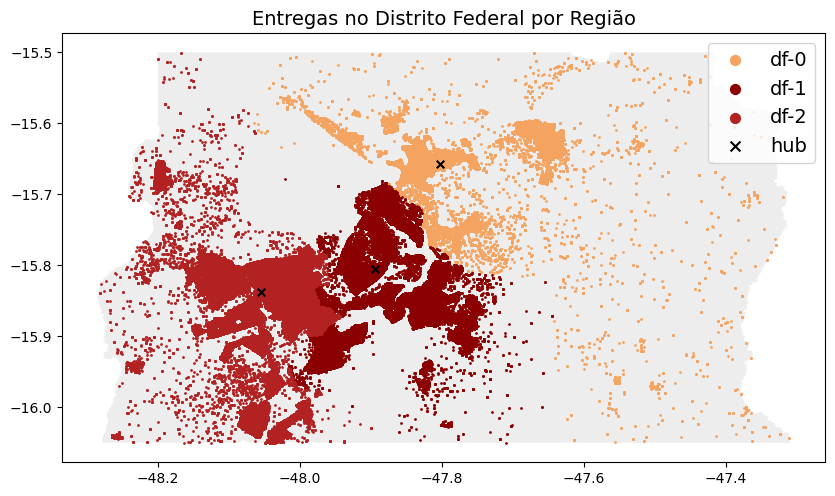

In [ ]:
import matplotlib.pyplot as plt

# cria o plot vazio
fig, ax = plt.subplots(figsize = (25/2.54, 25/2.54))

# plot mapa do distrito federal
mapa.plot(ax=ax, alpha=0.4, color="lightgrey")

# plot das entregas
geo_deliveries_df.query("region == 'df-0'").plot(ax=ax, markersize=1, color="sandybrown", label="df-0")
geo_deliveries_df.query("region == 'df-1'").plot(ax=ax, markersize=1, color="darkred", label="df-1")
geo_deliveries_df.query("region == 'df-2'").plot(ax=ax, markersize=1, color="firebrick", label="df-2")

# plot dos hubs
geo_hub_df.plot(ax=ax, markersize=30, marker="x", color="black", label="hub")

# plot da legenda
plt.title("Entregas no Distrito Federal por Região", fontdict={"fontsize": 14})
lgnd = plt.legend(prop={"size": 14})
for handle in lgnd.legendHandles:
    handle.set_sizes([50])



De acordo o mapa, observamos que os três hubs parecem estar bem localizados em relação ao trajeto das entregas. O hub da região central (df-1) possui grande parte das entregas concentradas ao seu redor. Já região df-2 as entregas começam e se distanciar. E na região df-0 talvez por haver uma menor concentração de pessoas, exista o maior espaçamento entre os pontos de entregas e uma maior distância do hub dessa região.


## **4.2. Gráfico de entregas por região**

Construiremos um gráfico de barras com o percentual de entregas por região, mas antes, extrairemos as colunas de interesse para um novo dataframe, contaremos quantas vezes as regiões aparecem e através do atributo Normalize faremos uma contagem relativa de proporção que resultará em uma porcentagem.

In [ ]:
# Extrair as colunas de regiao e de capacidade do veiculo
# Contar o número de ocorrências de cada combinação única de "region" e "vehicle_capacity", criar nova coluna
# e normalizar os resultados para que eles representem porcentagens em vez de contagens absolutas.
data = pd.DataFrame(deliveries_df[['region', 'vehicle_capacity']].value_counts(normalize=True)).reset_index()

# Renomear a nova coluna chamada de 0, para "region_percent"
data.rename(columns={0: "region_percent"}, inplace=True)
data.head()

,region,vehicle_capacity,region_percent
0,df-1,180,0.478988
1,df-2,180,0.410783
2,df-0,180,0.110229


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


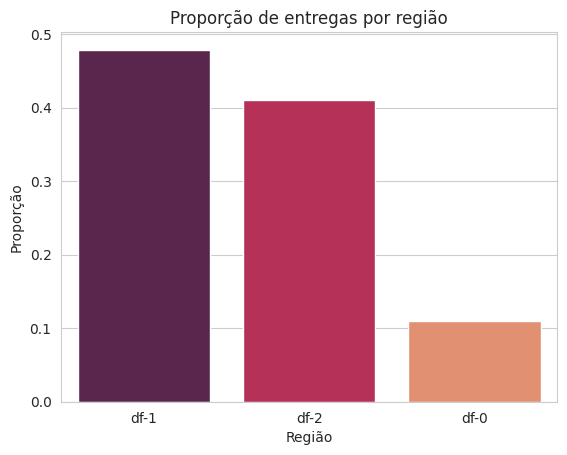

In [ ]:
# Visualizar o gráfico através do pacote seaborn
import seaborn as sns

with sns.axes_style('whitegrid'):
  grafico = sns.barplot(data=data, x="region", y="region_percent", errorbar=None, palette="rocket")
  grafico.set(title='Proporção de entregas por região', xlabel='Região', ylabel='Proporção');

# **5. Insight**

De acordo com os dados extraídos podemos verificar que a distribuição das entregas está bem concentrada nos hubs das regiões 1 e 2, enquanto que a região 0 fica com apenas 11% das entregas. A capacidade dos veículos é mesma para todos os hubs, porém no hub 0 as distâncias são maiores.

Poderia ser avaliada a possibilidade de se ter menos e maiores veículos na região 0 para que haja mais entregas feitas sem ter que voltar ao hub, já que a distâcia é maior. E até mesmo verificar a hipótese de se colocar mais um hub ao sul entre as regiões 0 e 1. Sugestões estas que economizariam gasolina e agilizariam as entregas.

